___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [7]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
tf.__version__

'2.9.2'

In [8]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [9]:
X_train[3].shape

(28, 28)

In [10]:
X_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,  33,  96, 175, 156,  64,
         14,  54, 137, 204, 194, 102,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  73, 186, 177, 183, 175, 188, 232,
        255, 223, 219, 194, 179, 186, 213, 146,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  35, 163, 140, 150, 152, 150, 146, 175,
        175, 173, 171, 156, 152, 148, 129, 156, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 150, 142, 140, 152, 160, 156, 146, 142,
        127, 135, 133, 140, 140, 137, 133, 125, 169,  75,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  54, 167, 146, 129, 142, 137, 137, 131,
        148, 148, 133, 131, 131, 131, 125, 140, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 110, 188, 133, 146, 152, 133, 125,
        127, 119, 129, 133, 119, 140, 131, 150,  14,   0,   0,   0,   0,
          0,   0],
       [  

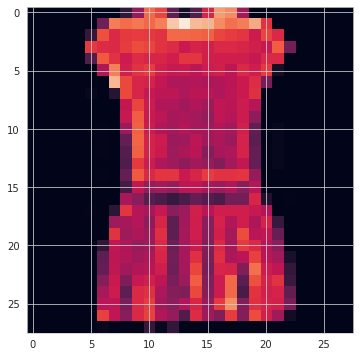

In [11]:
plt.imshow(X_train[3])

In [12]:
y_train.shape

(60000,)

In [13]:
y_train[3]

3

In [14]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [15]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

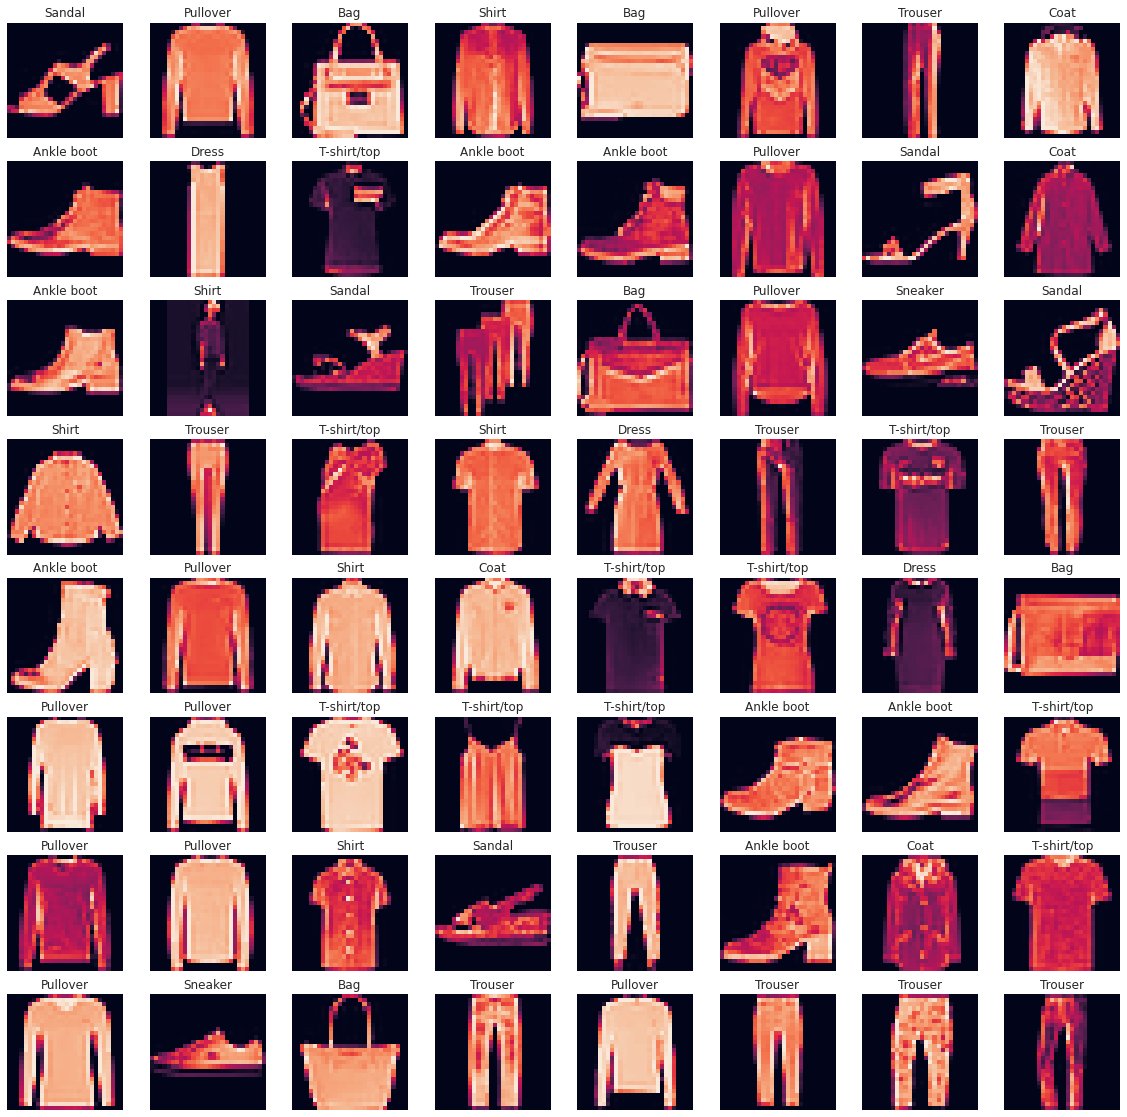

In [16]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [18]:
X_train[3].min()

0

In [19]:
X_train[3].max()

255

In [20]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [21]:
X_train[3].min()

0.0

In [22]:
X_train[3].max()

1.0

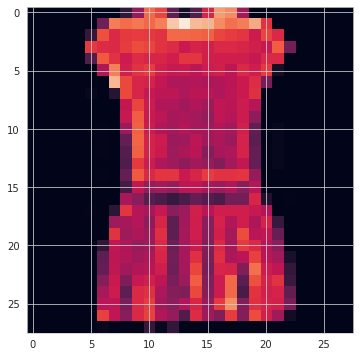

In [23]:
plt.imshow(X_train[3])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [24]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [25]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [26]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [27]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [29]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [30]:
Y_train[3]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [34]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # stride = 1, padding = valid 

model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1))) # padding = valid

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 128)               2240128   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,241,698
Trainable params: 2,241,698
Non-trainable params: 0
______________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [37]:
early_stop = EarlyStopping(monitor='val_accuracy',mode="max", patience=2, restore_best_weights = True)

In [39]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
from livelossplot import PlotLossesKerasTF

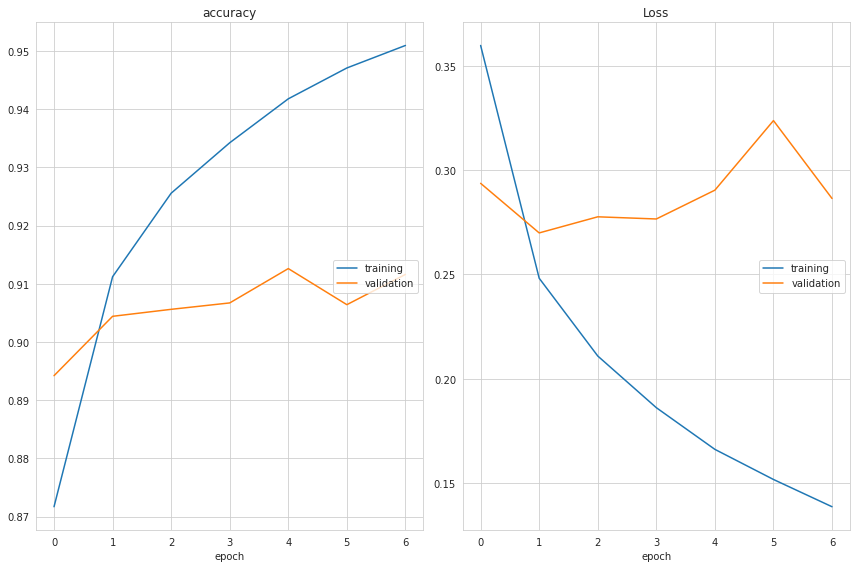

accuracy
	training         	 (min:    0.872, max:    0.951, cur:    0.951)
	validation       	 (min:    0.894, max:    0.913, cur:    0.912)
Loss
	training         	 (min:    0.139, max:    0.360, cur:    0.139)
	validation       	 (min:    0.270, max:    0.324, cur:    0.286)
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1386 - accuracy: 0.9509 - val_loss: 0.2865 - val_accuracy: 0.9116


In [41]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),verbose=1,callbacks=[early_stop, PlotLossesKerasTF()])

**TASK 7: Plot values of metrics you used in your model.**

In [42]:
model.metrics_names

['loss', 'accuracy']

In [43]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.360,0.872,0.294,0.894
1,0.248,0.911,0.270,0.904
2,0.211,0.926,0.278,0.906
3,0.186,0.934,0.277,0.907
4,0.166,0.942,0.290,0.913


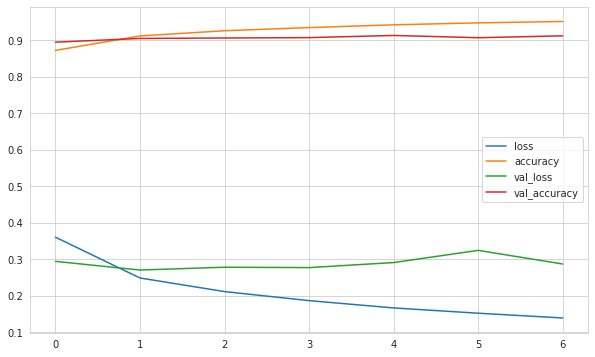

In [44]:
summary.plot();

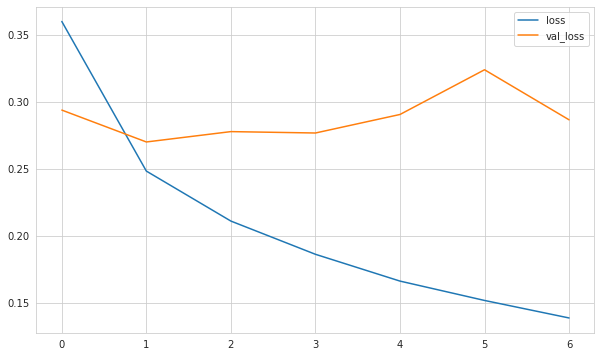

In [45]:
summary[["loss", "val_loss"]].plot();

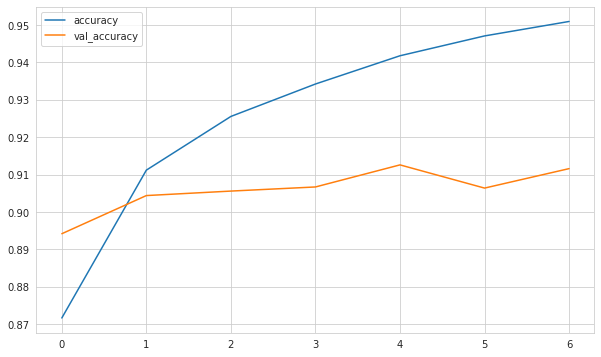

In [46]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [48]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2904 - accuracy: 0.9126


[0.290445476770401, 0.9125999808311462]

In [49]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.290445476770401
Test accuracy: 0.9125999808311462


In [50]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 1s 2ms/step


array([[7.8252933e-09, 1.0027219e-08, 1.7833596e-08, ..., 2.0360548e-04,
        1.8097547e-08, 9.9973911e-01],
       [3.1681640e-08, 1.3814140e-17, 1.0000000e+00, ..., 1.1689568e-13,
        1.1341269e-13, 3.2960796e-15],
       [5.0595997e-13, 1.0000000e+00, 2.6423373e-16, ..., 8.5785932e-21,
        8.1592990e-17, 5.1886956e-19],
       ...,
       [7.5095352e-09, 1.7570138e-19, 4.2274181e-11, ..., 9.5819963e-11,
        1.0000000e+00, 3.6947832e-17],
       [2.0426107e-09, 1.0000000e+00, 1.6827883e-12, ..., 1.4712161e-15,
        4.8254461e-13, 3.4633412e-14],
       [2.4743225e-05, 1.7820022e-07, 3.9418555e-05, ..., 5.4167761e-03,
        5.8319885e-05, 1.0325303e-04]], dtype=float32)

In [51]:
pred_prob.shape

(10000, 10)

In [55]:
pred_prob[3]

array([1.1835917e-09, 1.0000000e+00, 1.1801363e-12, 8.4310150e-09,
       3.4050351e-09, 2.2900852e-14, 1.3749295e-09, 1.0666854e-15,
       6.9707711e-13, 5.8204818e-15], dtype=float32)

In [54]:
np.argmax(pred_prob[3])

1

In [56]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [57]:
y_pred.shape

(10000,)

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1000
           1       0.99      0.97      0.98      1000
           2       0.89      0.84      0.87      1000
           3       0.87      0.95      0.91      1000
           4       0.82      0.90      0.86      1000
           5       0.98      0.97      0.97      1000
           6       0.81      0.69      0.74      1000
           7       0.94      0.98      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [59]:
print(confusion_matrix(y_test, y_pred))

[[876   1  13  26   7   2  73   0   2   0]
 [  0 975   0  16   3   0   3   0   3   0]
 [ 16   0 845   9  82   0  48   0   0   0]
 [ 11   2   6 954  14   0  13   0   0   0]
 [  1   1  32  44 900   1  21   0   0   0]
 [  0   0   0   1   0 967   0  24   0   8]
 [118   1  51  41  93   0 690   0   6   0]
 [  0   0   0   0   0   5   0 983   0  12]
 [  1   1   1   4   1   2   5   5 980   0]
 [  1   0   0   0   0   8   0  35   0 956]]


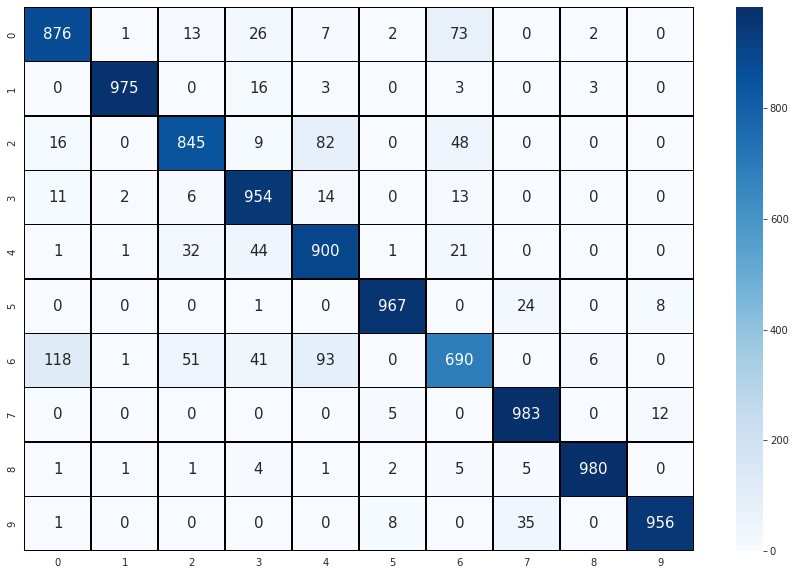

In [60]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

In [61]:
y_test != y_pred

array([False, False, False, ..., False, False, False])

In [62]:
(y_test != y_pred).sum()

874

## Prediction

In [63]:
my_number = X_test[3]

In [64]:
my_number.shape

(28, 28, 1)

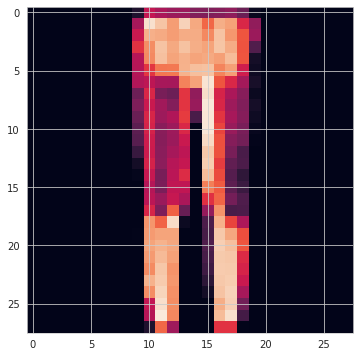

In [65]:
plt.imshow(my_number.reshape(28,28));

In [66]:
pred_prob = model.predict(my_number.reshape(1,28,28,1))
pred_prob

1/1 [==============================] - 0s 34ms/step


array([[1.1835892e-09, 1.0000000e+00, 1.1801341e-12, 8.4310310e-09,
        3.4050416e-09, 2.2900896e-14, 1.3749270e-09, 1.0666854e-15,
        6.9707711e-13, 5.8204818e-15]], dtype=float32)

In [67]:
y_pred = np.argmax(pred_prob)
y_pred

1

In [68]:
model.save("cnn.h5")

In [70]:
model=tf.keras.models.load_model('cnn.h5')

In [72]:
pred=model.predict(np.expand_dims(X_test[24],axis=0))

1/1 [==============================] - 0s 47ms/step


In [73]:
np.argmax(pred)

1

In [75]:
classes[np.argmax(pred)]

'Trouser'

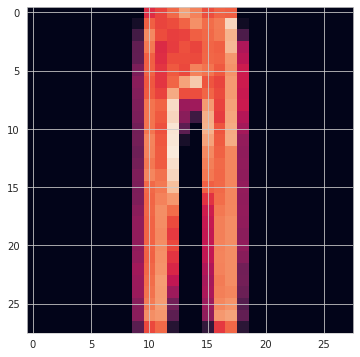

In [76]:
plt.imshow(X_test[24].reshape(28,28));

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___